In [89]:
import os
import numpy as np
import glob
from matplotlib_surface_plotting import plot_surf
from gene_viz.utils import get_data_path, load_mesh_geometry

In [92]:
mesh_files = [os.path.join(get_data_path(),'fs_LR.32k.L.pial.surf.gii'),
              os.path.join(get_data_path(),'Left-Cerebellum-Cortex_meshfile.surf.gii'),
              os.path.join(get_data_path(),'fs_LR.32k.R.pial.surf.gii'),
              os.path.join(get_data_path(),'Right-Cerebellum-Cortex_meshfile.surf.gii')
              ]

# mesh_files = glob.glob(os.path.join(get_data_path()))

delta_explode = 0.2

In [91]:
mesh_files

['/Users/mathilderipart/Documents/work/250603_MIC-HACK/gene_viz/data']

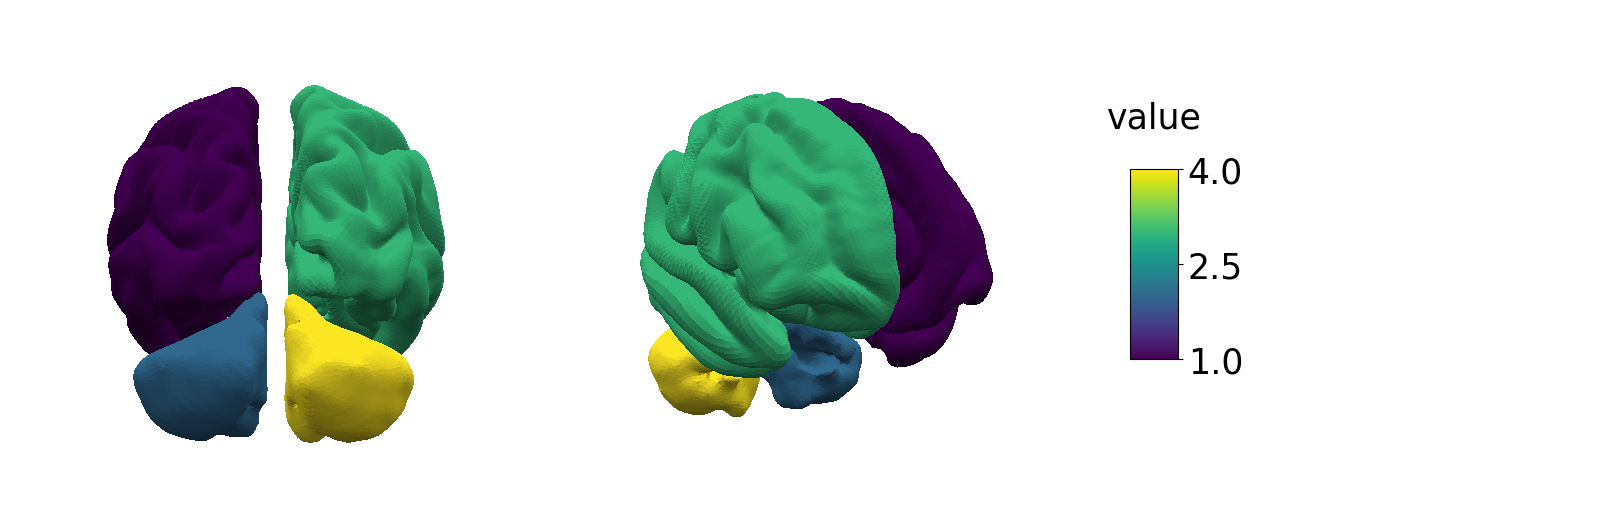

In [87]:
# concatenate meshes

vertices = []
faces = []
overlay = []
for i, mesh_file in enumerate(mesh_files): 
    mesh = load_mesh_geometry(mesh_file)
    if i==0:
        vertices = mesh['coords'] + (mesh['coords'].mean(axis=0)) * delta_explode
        faces = mesh['faces']
        overlay = np.ones(len(mesh['coords']))*1
    else:
        faces = np.vstack([faces, mesh['faces']+len(vertices)])
        # vertices = np.vstack([vertices,  mesh['coords']])
        vertices = np.vstack([vertices,  mesh['coords']+ (mesh['coords'].mean(axis=0)) * delta_explode])
        overlay = np.hstack([overlay, np.ones(len(mesh['coords']))*(i+1)])

# plot 
plot_surf(vertices, faces, overlay,
          rotate=[0,210],
           )